<a href="https://www.kaggle.com/code/dishantkharkar/prediction-model-for-mobile-price?scriptVersionId=152965991" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-price-classification/train.csv
/kaggle/input/mobile-price-classification/test.csv


## **Import Dataset**

In [2]:
df = pd.read_csv('/kaggle/input/mobile-price-classification/train.csv')

## Basic Checks 

In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.shape

(2000, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [7]:
df.count()

battery_power    2000
blue             2000
clock_speed      2000
dual_sim         2000
fc               2000
four_g           2000
int_memory       2000
m_dep            2000
mobile_wt        2000
n_cores          2000
pc               2000
px_height        2000
px_width         2000
ram              2000
sc_h             2000
sc_w             2000
talk_time        2000
three_g          2000
touch_screen     2000
wifi             2000
price_range      2000
dtype: int64

In [8]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


**CHECKING FOR NULL VALUES**

In [10]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

**Checking for Duplicated Values**

In [11]:
df.duplicated().sum()

0

# **Data Preprocessing**

In [12]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

## Check For Outliers

In [13]:
# extract  numerical columns from the dataset
num_data = df.select_dtypes(include=['int64','float64']).columns
num_data

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

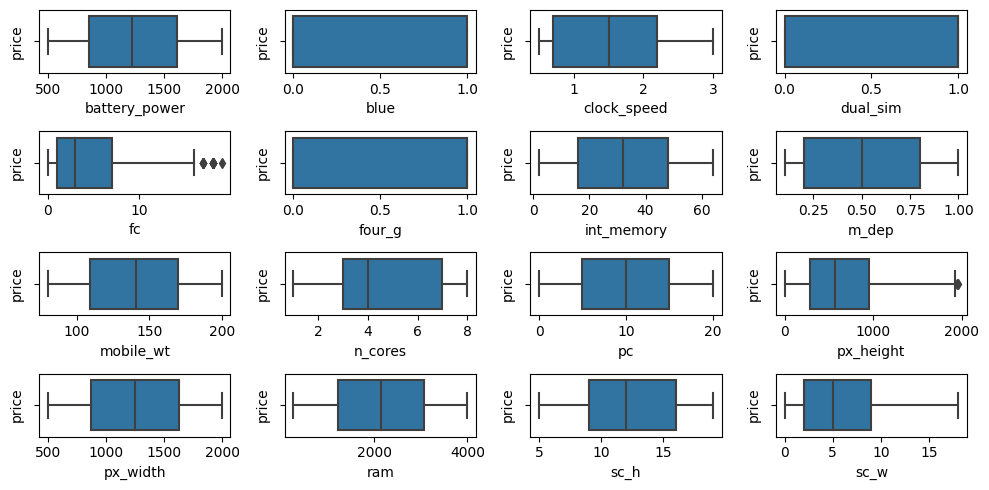

In [15]:
## Box plot for outlier detection
plt.figure(figsize=(10,5),facecolor="white")
plotnumber=1

for column in num_data:
  if plotnumber<17:
    ax=plt.subplot(4,4,plotnumber)
    sns.boxplot(x=df[column])
    plt.xlabel(column,fontsize=10)
    plt.ylabel("price",fontsize=10)
  plotnumber+=1
plt.tight_layout()

In [16]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Train test split

In [17]:
# split  data into x and y
x = df.drop('price_range',axis=1)
y = df.price_range

In [18]:
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [19]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [20]:
# traing and testing data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state= 42)

## Feature Selection

In [21]:
# correlation
x_train.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
battery_power,1.000000,0.015425,0.003123,-0.037793,0.034089,0.020141,-0.013248,0.048935,-0.014592,-0.004172,0.034854,0.038788,0.011605,-0.003311,-0.015779,-0.009655,0.039272,0.025032,0.000216,-0.019026
blue,0.015425,1.000000,0.012352,0.034934,-0.004331,-0.013592,0.045064,-0.013100,0.000254,0.043949,-0.023949,0.008535,-0.005492,0.013485,-0.002989,-0.009048,0.015498,-0.030703,0.015826,-0.014305
clock_speed,0.003123,0.012352,1.000000,0.010666,0.006213,-0.066096,0.007750,-0.029727,0.023777,-0.008789,-0.002590,-0.018203,-0.018467,-0.019339,-0.017568,-0.003905,-0.024196,-0.050628,0.026926,-0.017968
dual_sim,-0.037793,0.034934,0.010666,1.000000,-0.034181,0.005961,-0.015472,-0.029419,0.015240,-0.035017,-0.032480,-0.019981,0.015422,0.050622,-0.012737,-0.016724,-0.031869,-0.010855,-0.013276,0.011509
fc,0.034089,-0.004331,0.006213,-0.034181,1.000000,-0.012544,-0.025318,-0.022623,0.017586,0.007109,0.642925,0.001981,-0.004727,0.018028,-0.005245,-0.026677,0.000487,0.006589,-0.013586,0.043555
four_g,0.020141,-0.013592,-0.066096,0.005961,-0.012544,1.000000,-0.003127,-0.012733,-0.003628,-0.028423,-0.000261,-0.008556,0.023397,0.012590,0.030932,0.052818,-0.030760,0.587201,0.006676,-0.034259
int_memory,-0.013248,0.045064,0.007750,-0.015472,-0.025318,-0.003127,1.000000,-0.000661,-0.046102,-0.034992,-0.015698,-0.011330,-0.044998,0.040683,0.036488,0.009358,0.009023,0.000040,-0.022148,0.000215
m_dep,0.048935,-0.013100,-0.029727,-0.029419,-0.022623,-0.012733,-0.000661,1.000000,0.030759,-0.016244,0.008055,0.036773,0.033866,-0.011287,-0.004900,-0.024073,0.018799,-0.025630,-0.012607,-0.018824
mobile_wt,-0.014592,0.000254,0.023777,0.015240,0.017586,-0.003628,-0.046102,0.030759,1.000000,0.001197,0.011600,0.041586,0.023313,-0.006088,-0.019637,-0.014808,-0.008037,-0.003960,-0.009926,-0.010917
n_cores,-0.004172,0.043949,-0.008789,-0.035017,0.007109,-0.028423,-0.034992,-0.016244,0.001197,1.000000,-0.005414,-0.026368,0.042921,-0.002835,-0.005359,0.019677,0.005205,-0.004457,0.034300,0.005644


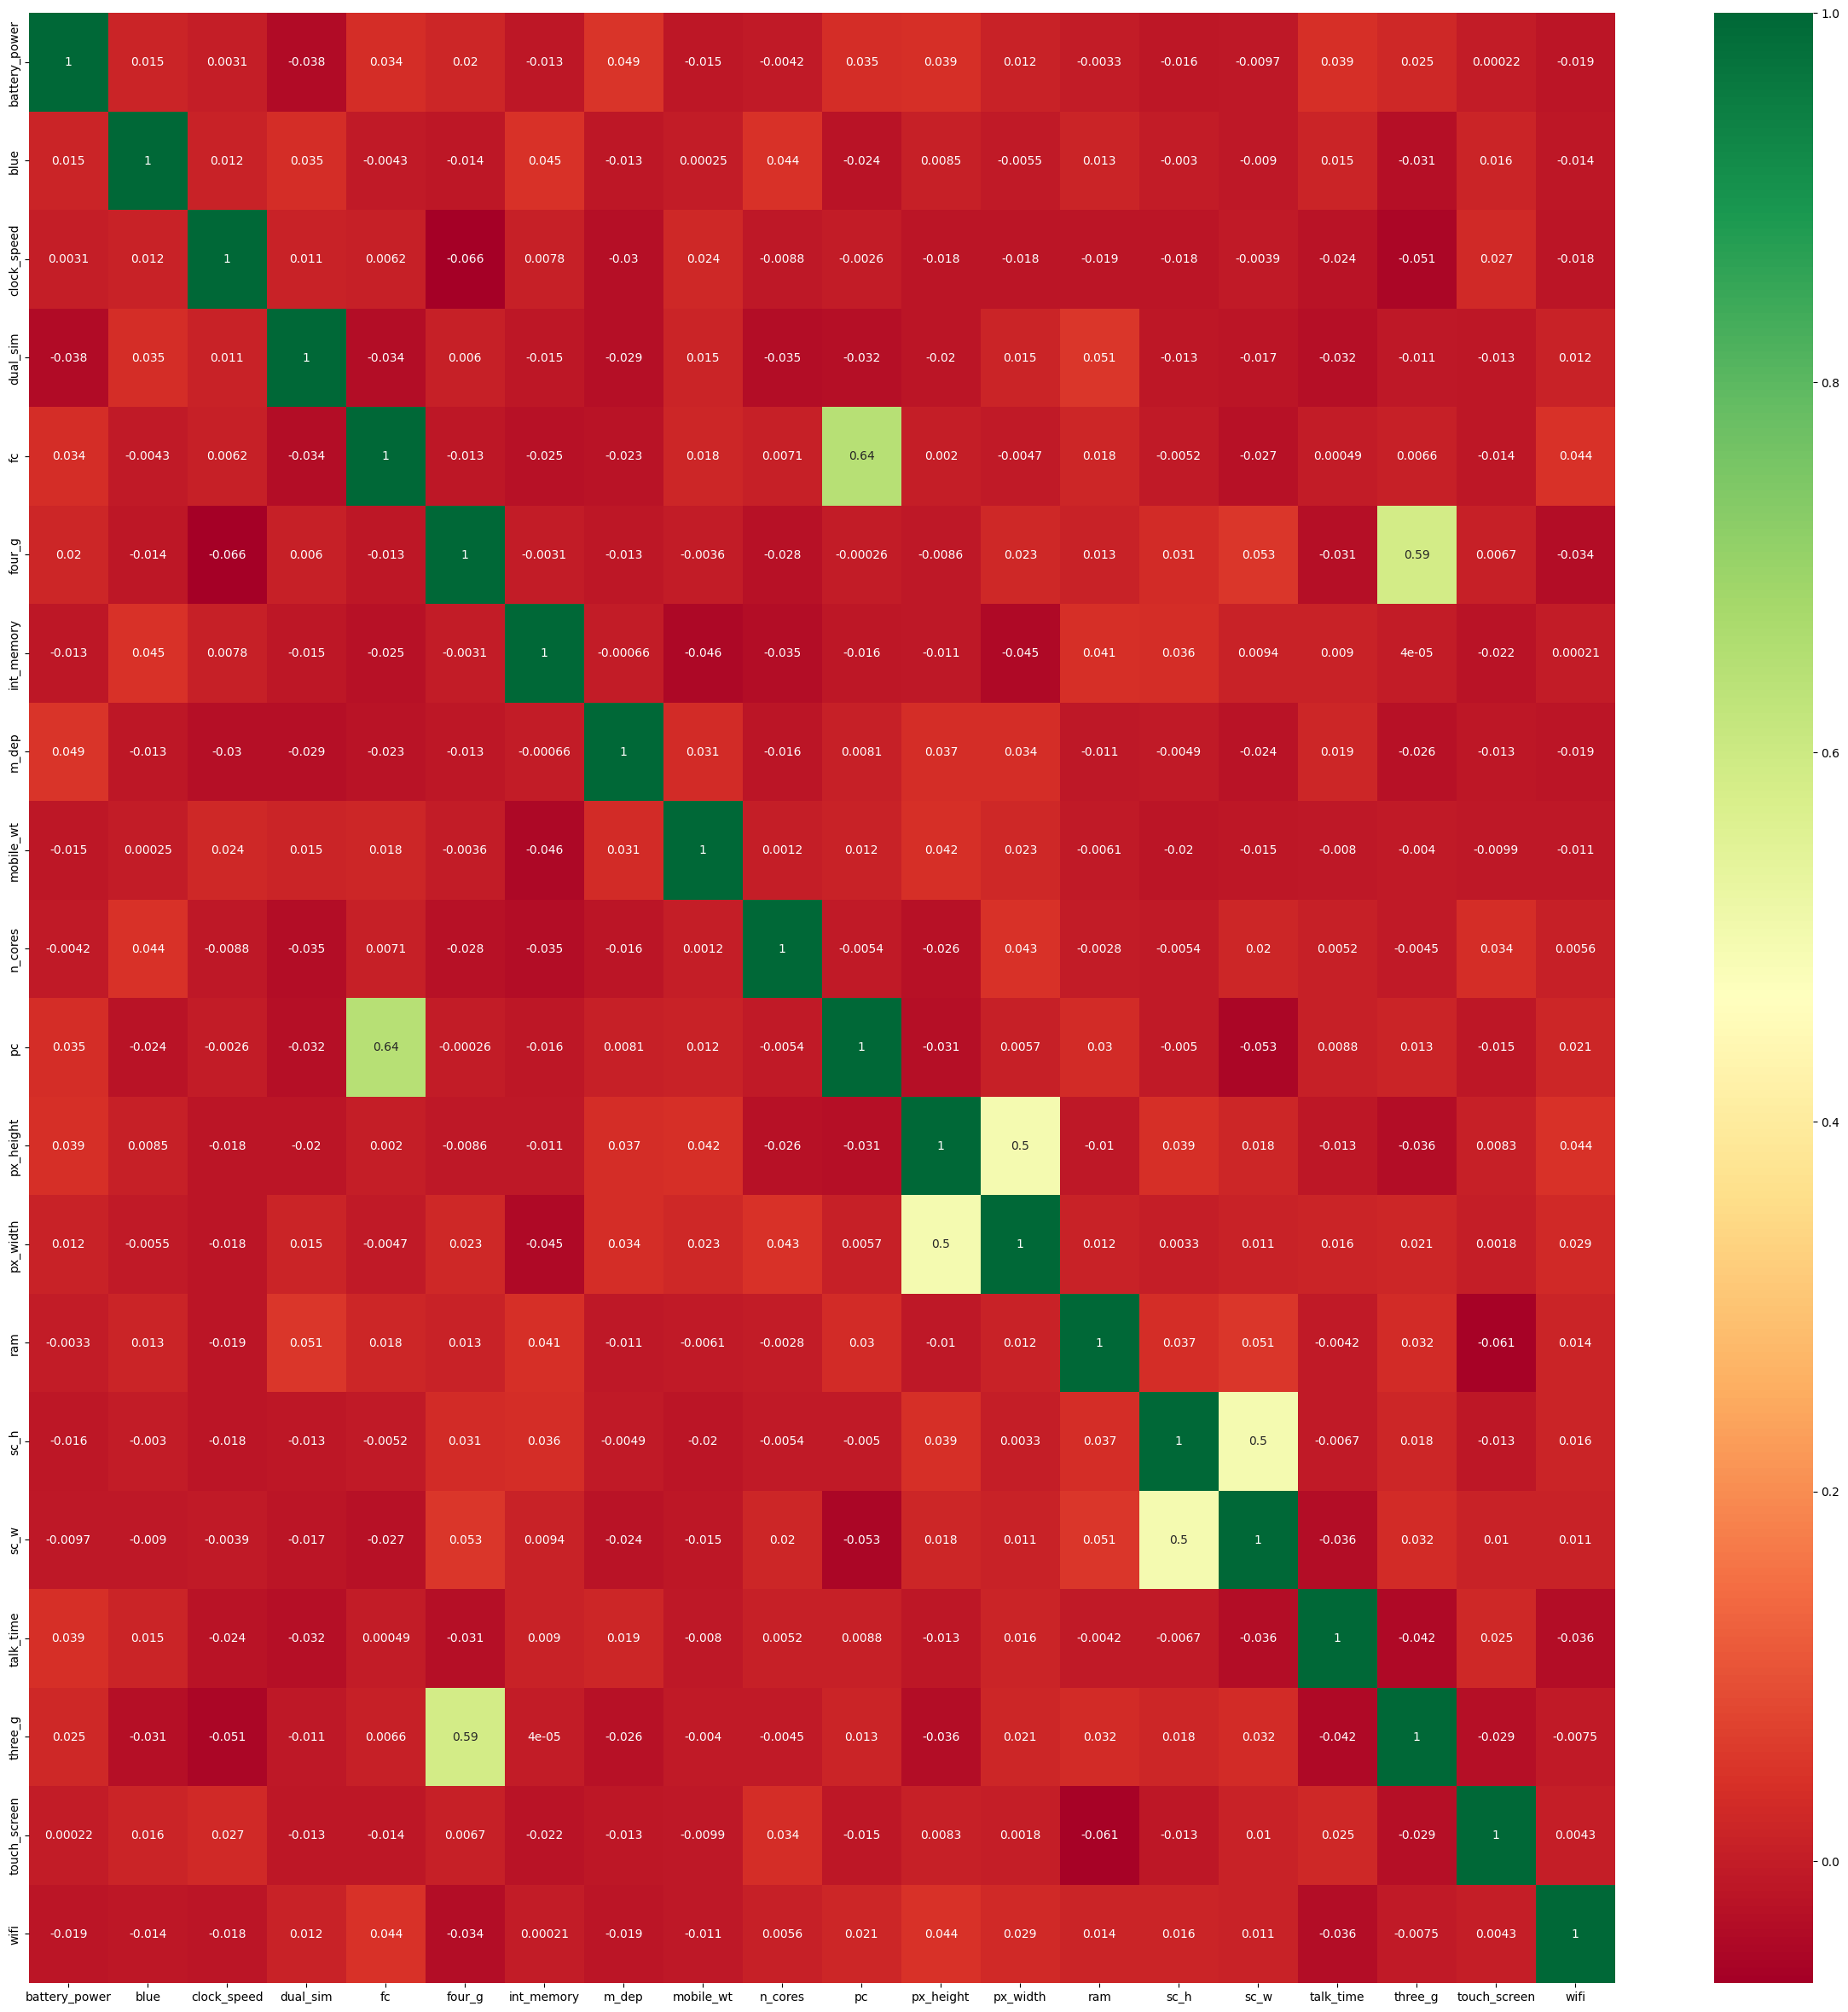

In [22]:
#Using Pearson Correlation
plt.figure(figsize=(30,30))
cor = x_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.RdYlGn)
plt.show()

In [23]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [24]:
corr_features = correlation(x_train, 0.7)
len(set(corr_features))

0

# **Model building**

In [25]:
df.price_range.value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

# Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
# intialize the model
model = LogisticRegression()
# train model with x_train,y_train
model.fit(x_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
# make prediction using x_test
y_pred=model.predict(x_test)
y_pred

array([0, 2, 0, 3, 1, 2, 2, 0, 3, 3, 0, 1, 2, 3, 2, 1, 2, 2, 1, 0, 0, 1,
       0, 2, 1, 1, 3, 3, 2, 0, 1, 0, 3, 0, 2, 3, 2, 1, 3, 0, 1, 2, 3, 0,
       3, 3, 3, 1, 3, 1, 3, 2, 0, 0, 2, 0, 1, 2, 0, 0, 1, 3, 2, 2, 2, 0,
       3, 3, 1, 1, 2, 1, 0, 1, 2, 0, 0, 3, 1, 1, 3, 2, 1, 0, 1, 3, 2, 3,
       3, 0, 3, 3, 3, 0, 3, 2, 3, 3, 2, 1, 0, 1, 0, 0, 1, 3, 3, 0, 0, 1,
       0, 0, 3, 3, 2, 1, 3, 3, 0, 2, 1, 3, 2, 2, 3, 3, 0, 3, 0, 2, 3, 0,
       2, 2, 0, 2, 1, 0, 0, 2, 3, 1, 3, 3, 0, 0, 1, 2, 1, 2, 3, 1, 1, 0,
       2, 3, 0, 1, 0, 1, 3, 3, 2, 2, 1, 0, 0, 2, 1, 3, 3, 1, 0, 0, 3, 1,
       1, 2, 0, 1, 0, 0, 0, 1, 3, 2, 0, 2, 0, 0, 0, 0, 2, 3, 3, 1, 0, 1,
       1, 1, 1, 2, 1, 2, 3, 3, 1, 3, 0, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1,
       3, 2, 3, 0, 0, 2, 0, 2, 0, 0, 1, 0, 2, 3, 2, 1, 0, 2, 3, 1, 3, 3,
       2, 3, 0, 3, 2, 2, 3, 3, 3, 1, 1, 3, 2, 1, 3, 3, 3, 3, 3, 0, 2, 2,
       2, 2, 3, 0, 3, 3, 2, 2, 2, 0, 1, 2, 0, 2, 3, 1, 3, 1, 1, 3, 0, 3,
       0, 0, 3, 0, 1, 2, 3, 2, 2, 0, 1, 0, 0, 3, 3,

In [28]:
# evalute the model
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report

In [29]:
confusion_matrix(y_test,y_pred)

array([[114,  36,   1,   0],
       [ 27,  74,  36,   9],
       [  1,  30,  79,  38],
       [  0,   3,  38, 114]])

In [30]:
accuracy_score(y_test,y_pred)

0.635

In [31]:
precision_score(y_test,y_pred,average='micro')

0.635

we use average beacuse we have multiple class target column

In [32]:
precision_score(y_test,y_pred,average='macro')

0.6353402415098679

In [33]:
precision_score(y_test,y_pred,average='weighted')

0.6374190506370543

In [34]:
recall_score(y_test,y_pred,average='macro')

0.6327709643093093

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.75      0.78       151
           1       0.52      0.51      0.51       146
           2       0.51      0.53      0.52       148
           3       0.71      0.74      0.72       155

    accuracy                           0.64       600
   macro avg       0.64      0.63      0.63       600
weighted avg       0.64      0.64      0.64       600



# KNeighborsClassifier

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
knn_classifer = KNeighborsClassifier(n_neighbors=3)

In [38]:
knn_classifer.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [39]:
y_pred = knn_classifer.predict(x_test)

In [40]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9133333333333333

In [41]:
precision_score(y_test,y_pred,average='micro')

0.9133333333333333

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       151
           1       0.87      0.92      0.89       146
           2       0.89      0.84      0.87       148
           3       0.94      0.94      0.94       155

    accuracy                           0.91       600
   macro avg       0.91      0.91      0.91       600
weighted avg       0.91      0.91      0.91       600



# Support vector Classifier

In [43]:
from sklearn.svm import SVC

In [44]:
svc_class = SVC()

In [45]:
svc_class.fit(x_train,y_train)

SVC()

In [46]:
y_pred = svc_class.predict(x_test)
y_pred

array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 0, 2, 3, 2, 2, 3, 3, 1, 0, 0, 1,
       1, 2, 0, 1, 3, 2, 2, 0, 0, 0, 3, 0, 1, 1, 2, 0, 3, 0, 2, 3, 2, 0,
       2, 2, 2, 1, 3, 1, 3, 1, 0, 0, 1, 1, 1, 3, 0, 0, 1, 3, 3, 1, 0, 0,
       3, 3, 1, 2, 2, 2, 0, 1, 2, 0, 1, 3, 2, 2, 3, 2, 1, 0, 1, 3, 1, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 1, 1, 0, 0, 1, 0, 0, 3, 2, 0, 1, 1,
       0, 0, 3, 1, 3, 2, 3, 2, 0, 2, 1, 3, 2, 1, 3, 3, 0, 3, 0, 2, 3, 0,
       2, 2, 0, 3, 1, 0, 0, 2, 2, 1, 2, 2, 0, 0, 0, 1, 1, 2, 3, 1, 1, 0,
       2, 2, 0, 1, 0, 2, 2, 3, 3, 2, 1, 0, 1, 2, 2, 3, 3, 0, 1, 0, 3, 1,
       1, 2, 1, 0, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 0, 0, 1, 3, 3, 1, 0, 1,
       1, 1, 1, 2, 2, 3, 3, 3, 1, 2, 0, 0, 0, 2, 1, 1, 3, 1, 0, 2, 1, 1,
       3, 2, 3, 0, 0, 2, 1, 3, 0, 1, 2, 0, 2, 3, 2, 0, 1, 3, 3, 0, 1, 3,
       3, 3, 0, 3, 1, 2, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 0, 1, 2,
       2, 2, 3, 0, 2, 3, 2, 2, 2, 1, 0, 1, 0, 3, 3, 1, 3, 1, 0, 3, 1, 2,
       0, 0, 3, 0, 1, 2, 3, 3, 3, 1, 1, 0, 1, 3, 3,

In [47]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9533333333333334

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       151
           1       0.91      0.99      0.95       146
           2       0.94      0.91      0.92       148
           3       0.97      0.95      0.96       155

    accuracy                           0.95       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.95      0.95      0.95       600



# Decision Tree Classifier

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
dt_class = DecisionTreeClassifier(random_state=42)

In [51]:
dt_class.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [52]:
y_pred = dt_class.predict(x_test)

In [53]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.82


In [54]:
# Display classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       151
           1       0.74      0.81      0.77       146
           2       0.75      0.74      0.74       148
           3       0.88      0.86      0.87       155

    accuracy                           0.82       600
   macro avg       0.82      0.82      0.82       600
weighted avg       0.82      0.82      0.82       600



# Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rf_class = RandomForestClassifier(n_estimators=100, random_state=42)

In [57]:
rf_class.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [58]:
y_pred = rf_class.predict(x_test)
y_pred

array([0, 2, 1, 3, 1, 2, 2, 0, 3, 1, 0, 1, 2, 3, 2, 2, 3, 3, 1, 0, 0, 1,
       1, 2, 0, 1, 3, 2, 2, 0, 0, 0, 3, 0, 1, 1, 2, 0, 3, 0, 2, 3, 2, 0,
       3, 2, 1, 1, 3, 1, 3, 1, 0, 0, 1, 1, 1, 2, 0, 0, 0, 3, 3, 2, 0, 0,
       3, 3, 1, 2, 2, 3, 0, 1, 2, 0, 0, 3, 2, 2, 3, 2, 1, 0, 1, 3, 2, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 2, 2, 0, 0, 1, 0, 0, 3, 2, 0, 1, 1,
       0, 0, 2, 1, 2, 2, 3, 3, 0, 2, 1, 3, 2, 1, 3, 3, 0, 2, 0, 2, 3, 0,
       2, 2, 0, 3, 1, 0, 0, 2, 3, 0, 2, 2, 0, 0, 0, 1, 2, 2, 3, 1, 1, 0,
       2, 2, 0, 1, 0, 1, 2, 3, 3, 3, 1, 0, 0, 2, 2, 3, 3, 1, 0, 0, 3, 1,
       2, 2, 1, 0, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 0, 0, 1, 3, 3, 1, 0, 1,
       2, 1, 1, 2, 2, 2, 3, 3, 1, 2, 0, 0, 0, 2, 2, 1, 3, 1, 0, 2, 1, 1,
       3, 1, 3, 0, 0, 2, 1, 3, 0, 0, 1, 0, 1, 3, 2, 0, 1, 3, 3, 0, 2, 3,
       3, 3, 0, 3, 1, 2, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 0, 1, 2,
       2, 2, 2, 0, 2, 3, 2, 2, 2, 1, 0, 2, 0, 3, 3, 1, 3, 1, 0, 3, 1, 2,
       0, 0, 3, 0, 1, 2, 3, 3, 3, 1, 0, 0, 1, 3, 3,

In [59]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.87


In [60]:
# Display classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       151
           1       0.82      0.82      0.82       146
           2       0.79      0.78      0.79       148
           3       0.92      0.91      0.92       155

    accuracy                           0.87       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.87      0.87      0.87       600



# XGBOOST Classifier

In [61]:
import xgboost as xgb

In [62]:
xgb_class = xgb.XGBClassifier(random_state=42)

In [63]:
xgb_class.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [64]:
y_pred = xgb_class.predict(x_test)


In [65]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.90


After experimenting with various machine learning models, including K-Nearest Neighbors, Decision Trees, Random Forest, and XGBoost, the Support Vector Classifier (SVC) emerged as the most effective model for our dataset. The SVC achieved the highest accuracy, outperforming other models such as KNN, Decision Trees, Random Forest, and XGBoost. The accuracy was assessed using a standard train-test split, and the classification report further demonstrated the robust performance of the SVC, showcasing high precision, recall, and F1-score across multiple classes. Therefore, based on our evaluation, the Support Vector Classifier is recommended for this particular classification task